In [37]:
# Import Libraries
import pandas as pd # Handles tabular data (DataFrames) and CSV reading
import numpy as np # Provides numerical and array operations
import matplotlib.pyplot as plt # Creates visualizations
import seaborn as sns # Enhances visualizations with attractive statistical plots
import nltk # Provides NLP tools like tokenization, stopwords, and text processing
from nltk.corpus import stopwords # Contains common stopwords (e.g., "the", "and", "is") to remove from text
from nltk.tokenize import word_tokenize # Splits text into individual words (tokens)
from wordcloud import WordCloud  # Creates word clouds from text data




In [38]:
import pandas as pd

# Load Hamlet dataset
hamlet_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-09-17/hamlet.csv'
df_hamlet = pd.read_csv(hamlet_url)

# Basic dataset info
print(df_hamlet.head())
print(df_hamlet.info())
print(df_hamlet.describe(include='all'))



     act    scene          character  \
0  Act I  Scene I  [stage direction]   
1  Act I  Scene I           Bernardo   
2  Act I  Scene I          Francisco   
3  Act I  Scene I           Bernardo   
4  Act I  Scene I          Francisco   

                                       dialogue  line_number  
0  FRANCISCO at his post. Enter to him BERNARDO          NaN  
1                                  Who's there?          1.0  
2   Nay, answer me: stand, and unfold yourself.          2.0  
3                           Long live the king!          3.0  
4                                     Bernardo?          4.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   act          4217 non-null   object 
 1   scene        4217 non-null   object 
 2   character    4217 non-null   object 
 3   dialogue     4217 non-null   object 
 4   line_number  4011 

In [41]:
import nltk
nltk.download('punkt', download_dir=r"C:\Users\mosey\AppData\Roaming\nltk_data")
nltk.download('stopwords', download_dir=r"C:\Users\mosey\AppData\Roaming\nltk_data")
nltk.data.path.append(r"C:\Users\mosey\AppData\Roaming\nltk_data")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mosey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mosey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
from nltk.corpus import stopwords # Import the list of common stopwords (like "the", "is", "and") from NLTK
from nltk.tokenize import RegexpTokenizer # Import a regular-expression-based tokenizer
import nltk # Import the full NLTK (Natural Language Toolkit) library

# Ensure stopwords are downloaded 
nltk.download('stopwords')

tokenizer = RegexpTokenizer(r'\b[a-zA-Z]+\b')  # Matches words only

# New robust text cleaning function
def clean_text(text):
    tokens = tokenizer.tokenize(str(text).lower())
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

# Apply cleaning
df_hamlet['clean_text'] = df_hamlet['dialogue'].apply(clean_text)
print(df_hamlet[['dialogue', 'clean_text']].head())



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mosey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                       dialogue                     clean_text
0  FRANCISCO at his post. Enter to him BERNARDO  francisco post enter bernardo
1                                  Who's there?                               
2   Nay, answer me: stand, and unfold yourself.        nay answer stand unfold
3                           Long live the king!                 long live king
4                                     Bernardo?                       bernardo


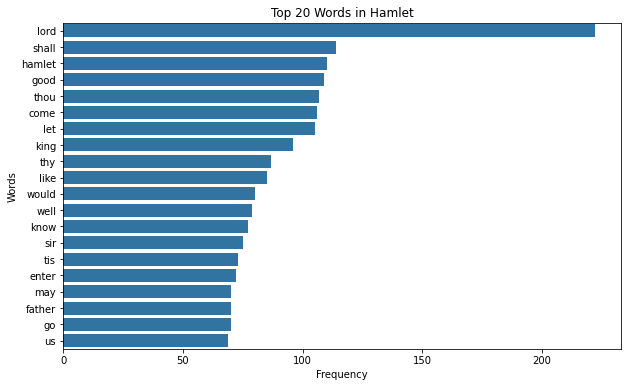

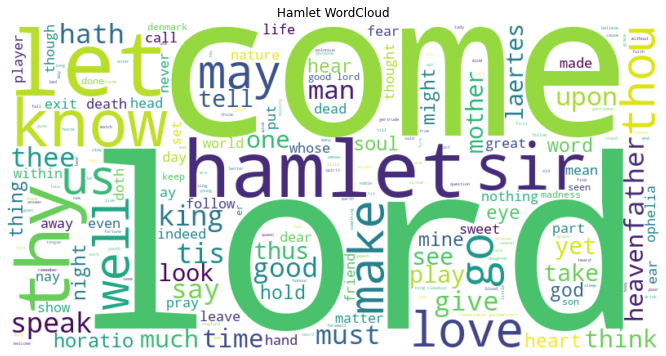

In [43]:
# Drop rows where clean_text is empty
df_hamlet = df_hamlet[df_hamlet['clean_text'].str.strip().astype(bool)]
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Word Frequency Analysis
all_words = " ".join(df_hamlet['clean_text']).split()
word_freq = Counter(all_words).most_common(20)

# Bar plot of most common words
words, counts = zip(*word_freq)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Words in Hamlet")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hamlet WordCloud')
plt.show()


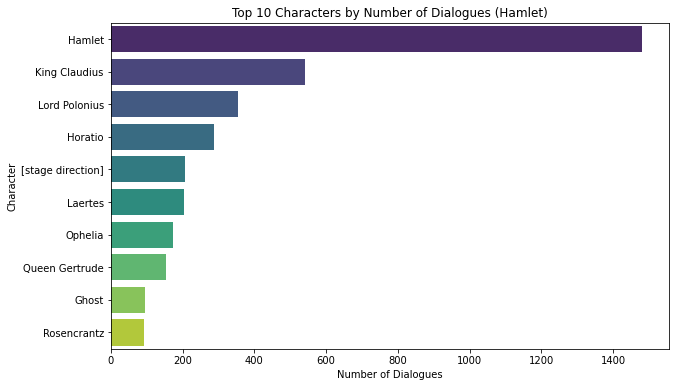

In [44]:
# Corrected code without palette warning:
import matplotlib.pyplot as plt
import seaborn as sns

top_characters = df_hamlet['character'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    y=top_characters.index, 
    x=top_characters.values, 
    hue=top_characters.index, 
    legend=False, 
    palette='viridis'
)
plt.title("Top 10 Characters by Number of Dialogues (Hamlet)")
plt.xlabel("Number of Dialogues")
plt.ylabel("Character")
plt.show()



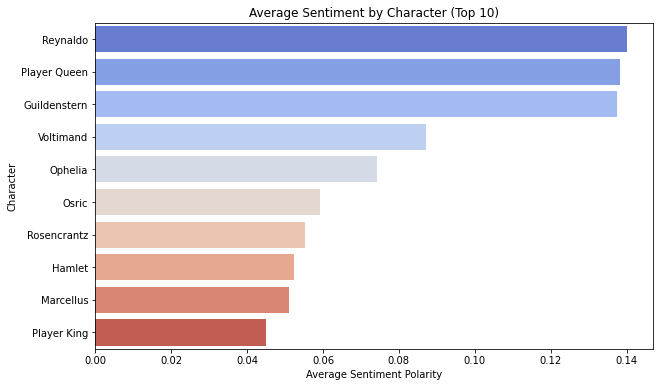

In [45]:
from textblob import TextBlob # Used for performing NLP tasks: sentiment analysis and text classification

# Avoid SettingWithCopyWarning by creating a copy explicitly
df_hamlet = df_hamlet.copy()

# Sentiment analysis
df_hamlet['sentiment'] = df_hamlet['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate average sentiment by character
sentiment_by_character = (
    df_hamlet.groupby('character')['sentiment']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plotting sentiment by character without the palette warning
plt.figure(figsize=(10, 6))
sns.barplot(
    y=sentiment_by_character.index,
    x=sentiment_by_character.values,
    hue=sentiment_by_character.index,
    palette='coolwarm',
    legend=False
)
plt.title('Average Sentiment by Character (Top 10)')
plt.xlabel('Average Sentiment Polarity')
plt.ylabel('Character')
plt.show()



In [46]:
import gensim # Library for unsupervised topic modeling and natural language processing, used here for LDA topic modeling

from gensim import corpora # Provides tools to create a dictionary required for topic modeling in Gensim
from nltk.tokenize import RegexpTokenizer # Tokenizer from NLTK that uses regular expressions to extract only meaningful word tokens 

# Use regex-based tokenizer (avoids `punkt`)
tokenizer = RegexpTokenizer(r'\b[a-zA-Z]+\b')

# Prepare data for topic modeling
texts = [tokenizer.tokenize(text) for text in df_hamlet['clean_text']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA model
lda_model = gensim.models.ldamulticore.LdaMulticore(
    corpus, num_topics=5, id2word=dictionary, passes=10, workers=2
)

# Display topics
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
    print(f'Topic #{idx+1}: {topic}')



Topic #1: 0.018*"thy" + 0.013*"queen" + 0.011*"know" + 0.011*"drink" + 0.010*"hear"
Topic #2: 0.024*"give" + 0.018*"let" + 0.016*"yet" + 0.014*"go" + 0.014*"us"
Topic #3: 0.024*"hamlet" + 0.023*"good" + 0.021*"king" + 0.017*"speak" + 0.012*"cause"
Topic #4: 0.029*"lord" + 0.018*"well" + 0.013*"drink" + 0.013*"dies" + 0.012*"play"
Topic #5: 0.023*"come" + 0.022*"thou" + 0.021*"hamlet" + 0.019*"shall" + 0.019*"laertes"


In [48]:
import os # Provides a way to interact with the operating system, used here to set environment variables
from transformers import pipeline # Loads pre-trained NLP models for summarization and paraphrasing 

# Fix Hugging Face symlink warning for Windows
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

# Load a summarization model explicitly
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Get first dialogue text
dialogue_text = df_hamlet['dialogue'].iloc[0]

# Dynamically adjust max_length to avoid warnings
max_length = min(len(dialogue_text.split()) + 10, 50)

# Generate summary
summary = summarizer(dialogue_text, max_length=max_length, min_length=10, do_sample=False)

# Output results
print("Original Text:\n", dialogue_text)
print("\nSummarized Text:\n", summary[0]['summary_text'])



Device set to use cpu
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text:
 FRANCISCO at his post. Enter to him BERNARDO

Summarized Text:
 The Daily Discussion is open to everyone. Please share your thoughts on this week


In [49]:
from transformers import pipeline

paraphraser = pipeline("text2text-generation", model="t5-base")

# Reformat input to sound more like a sentence
dialogue_text = "The scene opens with FRANCISCO at his post. Then BERNARDO enters."

prompt = f"Paraphrase this: {dialogue_text}"

response = paraphraser(prompt, max_length=50, min_length=10, do_sample=False)

print("\nParaphrased Text:\n", response[0]['generated_text'])


Device set to use cpu



Paraphrased Text:
 : The scene opens with FRANCISCO at his post. Then BERNARDO enters.
